In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
airlines = pd.read_csv("EastWestAirlines.csv")
airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
df_norm = norm_func(airlines.iloc[:,1:])
df_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(airlines.iloc[:,1:]))
data

0    1     2    3    4         5         6         7         8   \
0     0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1     0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2     0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3     0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4     0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   
...        ...  ...   ...  ...  ...       ...       ...       ...       ...   
3994  0.010837  0.0  0.00  0.0  0.0  0.032330  0.046512  0.006490  0.018868   
3995  0.037766  0.0  0.00  0.0  0.0  0.003720  0.058140  0.000000  0.000000   
3996  0.043169  0.0  0.50  0.0  0.0  0.096505  0.093023  0.000000  0.000000   
3997  0.032202  0.0  0.00  0.0  0.0  0.001896  0.011628  0.016225  0.018868   
3998  0.001769  0.0  0.00  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

            9    10  
0     0.843742  0.0  
1     0.839884  0.0  
2     0.847842  0.0  
3     0.837955  0.0  
4     0.835905  1.0  
...        ...  ...  
3994  0.168917  1.0  
3995  0.167953  1.0  
3996  0.168797  1.0  
3997  0.168676  0.0  
3998  0.168314  0.0  

[3999 rows x 11 columns]

H-Clustering

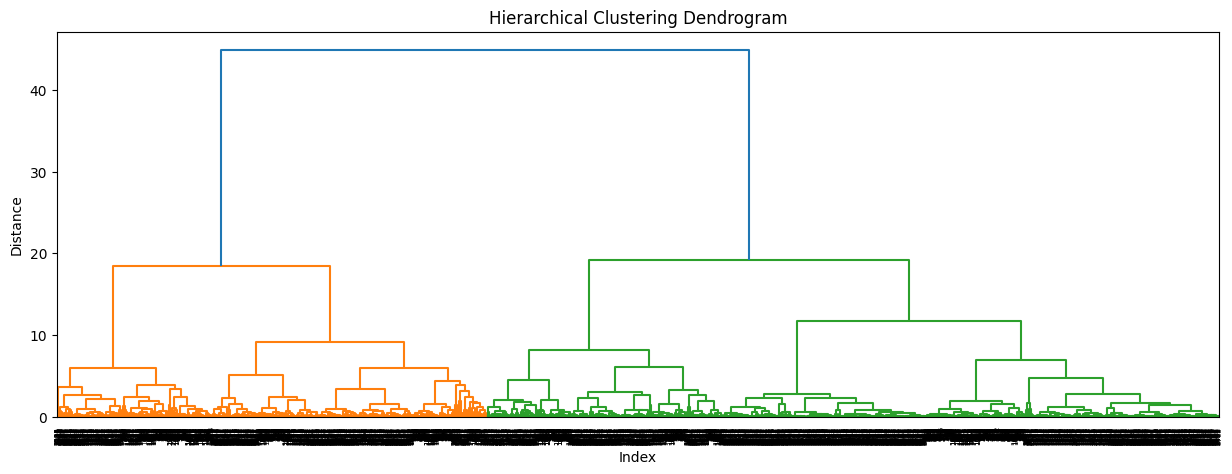

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(df_norm, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
    )
plt.show()

In [ ]:
x = df_norm.values

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='ward',affinity = "euclidean").fit(df_norm)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airlines['clust']=cluster_labels # creating a  new column and assigning it to new column
airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
4          1      3  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      4  
3998       0      4  

[3999 rows x 13 columns]

In [ ]:
airlines.iloc[:,1:].groupby(airlines.clust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                              
0      9.597426e+04  240.572888   2.656676   1.015668   1.000681   
1      5.980784e+04   87.602462   1.705322   1.013900   1.008737   
2      1.704838e+06    0.000000   1.000000   1.000000   1.000000   
3      1.319995e+05  347.000000   2.500000   1.000000   1.000000   
4      7.656512e+04  147.750000   3.875000   1.000000   4.250000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clust                                                                   
0       28342.702997    15.547003         804.152589         2.461853   
1       10227.689039     9.142971         226.292295         0.652502   
2       17108.000000    32.000000        4823.000000        23.000000   
3       65634.250000    69.250000       19960.000000        49.250000   
4      115273.250000    30.250000         600.000000         2.000000   

       Days_since_enroll  Award?  clust  
clust                                    
0            4627.118529     1.0    0.0  
1            3820.652105     0.0    1.0  
2            7283.000000     1.0    2.0  
3            2200.250000     1.0    3.0  
4            5127.875000     1.0    4.0

In [ ]:
labels = h_complete.labels_

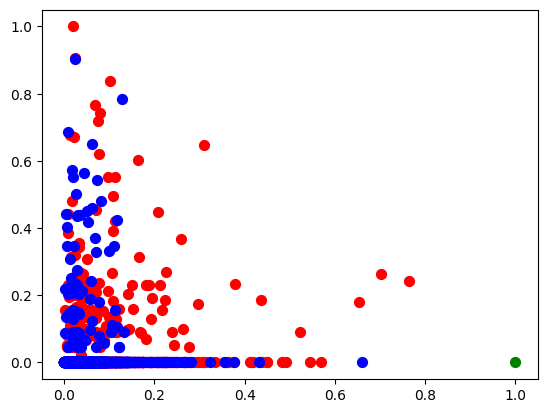

In [ ]:
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=50, marker='o', color='green')

K-Means

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df_norm)
k_means

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
k_means1=k_means+1
k_cluster = list(k_means1)

In [ ]:
airlines['k_cluster'] = k_cluster

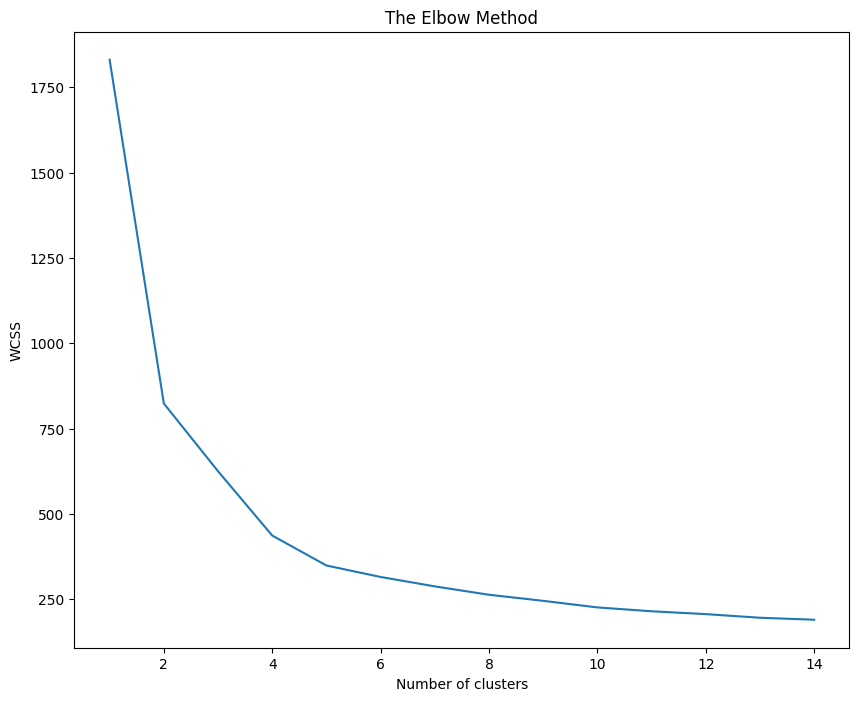

In [ ]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_mean_cluster = pd.DataFrame(round(airlines.groupby('k_cluster').mean(),1))

In [ ]:
kmeans_mean_cluster

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
k_cluster                                                                  
1          1745.6   97053.1       240.2        2.7        1.0        1.0   
2          2284.4   40747.6        92.3        1.1        1.0        1.0   
3          1833.5  118032.1        73.1        3.6        1.0        1.0   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
k_cluster                                                                 
1              28905.4         15.8              857.5              2.6   
2               3335.2          6.5              226.6              0.7   
3              31282.7         17.3              225.4              0.6   

           Days_since_enroll  Award?  clust  
k_cluster                                    
1                     4625.1     1.0    1.9  
2                     3619.1     0.0    1.8  
3                     4436.3     0.0    2.0

In [ ]:
pd.DataFrame(round(airlines.groupby('k_cluster').count(),1))

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
k_cluster                                                               
1          1481     1481        1481       1481       1481       1481   
2          1897     1897        1897       1897       1897       1897   
3           621      621         621        621        621        621   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
k_cluster                                                                 
1                 1481         1481               1481             1481   
2                 1897         1897               1897             1897   
3                  621          621                621              621   

           Days_since_enroll  Award?  clust  
k_cluster                                    
1                       1481    1481   1481  
2                       1897    1897   1897  
3                        621     621    621

In [ ]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [ ]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([4, 4, 4, ..., 1, 0, 0], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.33066907e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [ ]:
clf.inertia_

348.943321725414

In [ ]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object
airlines['clust']=md # creating a  new column and assigning it to new column
airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      4  
1          0      4  
2          0      4  
3          0      4  
4          1      1  
...      ...    ...  
3994       1      3  
3995       1      3  
3996       1      1  
3997       0      0  
3998       0      0  

[3999 rows x 13 columns]

In [ ]:
plt.style.use(['classic'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

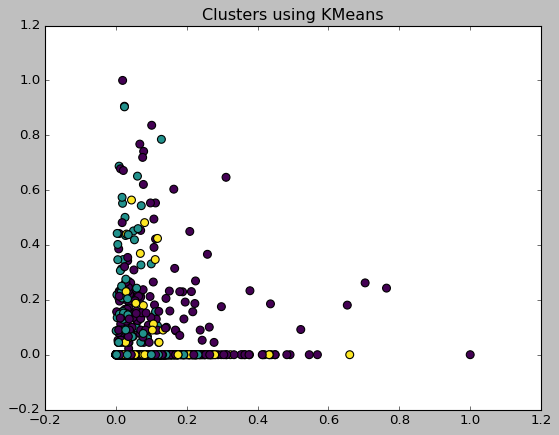

In [ ]:
plt.scatter(x[:, 0], x[:, 1],c=k_means,s=50 ,cmap='viridis')
plt.title('Clusters using KMeans')

DB SCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
print(airlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  clust              3999 non-null   int32
 13  k_cluster          3999 non-null   int32
dtypes: int32(2), int64(12)
memory usage: 406.3 KB
None


In [ ]:
array=airlines.values
array

array([[    1, 28143,     0, ...,     0,     4,     2],
       [    2, 19244,     0, ...,     0,     4,     2],
       [    3, 41354,     0, ...,     0,     4,     2],
       ...,
       [ 4019, 73597,     0, ...,     1,     1,     1],
       [ 4020, 54899,     0, ...,     0,     0,     2],
       [ 4021,  3016,     0, ...,     0,     0,     2]])

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.40820145e+00,  3.10602969e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.40820145e+00,  3.10602969e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.40820145e+00,  3.10602969e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -5.88512033e-01, -1.13370084e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -1.25408319e+00,  3.10602969e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -1.25408319e+00,  3.10602969e-01]])

In [ ]:
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.475)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0,  0, ..., -1, 22, 22])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl
pd.set_option("display.max_rows", None)
cl

cluster
0           0
1           0
2           0
3           0
4          -1
5           0
6          -1
7           1
8          -1
9          -1
10         -1
11         -1
12         -1
13          0
14          0
15         -1
16         -1
17          1
18          5
19         -1
20         -1
21         -1
22         -1
23          0
24         -1
25          0
26         -1
27          0
28         -1
29         -1
30         -1
31          0
32         -1
33          0
34          0
35         -1
36         -1
37         -1
38         -1
39          4
40          0
41         -1
42         -1
43         -1
44          8
45         -1
46         -1
47          1
48         -1
49         -1
50         -1
51          0
52         -1
53         -1
54          0
55          0
56          2
57         -1
58         -1
59         -1
60          6
61         -1
62          0
63         -1
64          0
65         -1
66          0
67          2
68         -1
69          3
70         -1
71         -1
72         -1
73         -1
74         -1
75          8
76          0
77         -1
78         -1
79         -1
80         -1
81         -1
82          0
83          0
84          0
85         -1
86          1
87         -1
88         -1
89          1
90         -1
91         -1
92         -1
93         -1
94         -1
95          0
96         -1
97          2
98          0
99         -1
100        -1
101         4
102         0
103        -1
104         0
105        -1
106        -1
107         4
108        -1
109        -1
110        -1
111        -1
112        -1
113        -1
114        -1
115        -1
116        -1
117        -1
118         5
119         1
120         0
121        -1
122        -1
123         3
124        -1
125        -1
126        -1
127        -1
128         7
129        -1
130         4
131         1
132        -1
133        -1
134         5
135        -1
136         2
137        -1
138        -1
139         0
140         0
141         0
142         0
143         2
144         6
145        -1
146         0
147        -1
148         6
149         0
150        -1
151        -1
152        -1
153         0
154        -1
155        -1
156        -1
157         3
158        -1
159         0
160         6
161        -1
162        -1
163        -1
164         3
165         0
166         0
167        -1
168        -1
169        -1
170        -1
171         0
172        -1
173        -1
174        -1
175        -1
176        -1
177        -1
178         4
179        -1
180        -1
181        -1
182         0
183         7
184         6
185         6
186        -1
187        -1
188        -1
189         0
190        -1
191        -1
192        -1
193        -1
194         4
195        -1
196        -1
197         8
198        -1
199        -1
200        -1
201        -1
202         0
203        -1
204         0
205         0
206        -1
207        -1
208         3
209         0
210        -1
211         0
212        -1
213         3
214        -1
215        -1
216         0
217         0
218        -1
219         9
220        -1
221        -1
222        -1
223         0
224        -1
225        -1
226        -1
227        -1
228        -1
229        -1
230         5
231        -1
232         0
233         7
234         7
235        -1
236         0
237        -1
238        -1
239         0
240        -1
241         7
242        -1
243        -1
244        -1
245        -1
246        -1
247        -1
248        -1
249        -1
250         0
251        -1
252        -1
253         3
254        -1
255        -1
256        -1
257        -1
258        -1
259        -1
260        -1
261         0
262        -1
263        -1
264        -1
265         5
266         0
267         0
268        -1
269        -1
270         5
271        -1
272        -1
273        -1
274         0
275        -1
276         0
277        -1
278         0
279        -1
280        -1
281        -1
282        -1
283        -1
284        -1
28

In [ ]:
al = pd.concat([airlines,cl],axis=1)
al

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

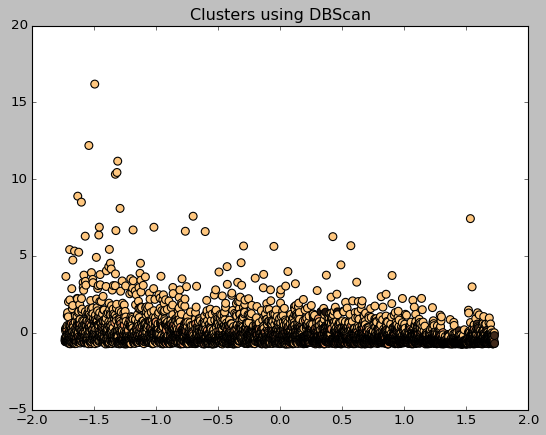

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=dbscan.labels_ ,s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

#From the above data generated from K-Means clustering, we can see Cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers. We will target cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.